# Tests coverage for genetic algorithm for the Courier Problem 

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [31]:
import glob
import json

test_dir = "data/"
results_dir = "results/"

test_files = glob.glob(f"{test_dir}/*.json")


def get_json_key_lengths(filepath):
    with open(filepath, "r") as f:
        data = json.load(f)
    return {key: len(value) for key, value in data.items()}


tests_summary = []
for f in test_files:
    row = {"filename": f.replace("data/", "").replace(".json", "")}
    row.update(get_json_key_lengths(f))
    tests_summary.append(row)

tests_df = pd.DataFrame(tests_summary)

if "graph" in tests_df.columns:
    tests_df.drop(columns=["graph"], inplace=True)
if "permissions" in tests_df.columns:
    tests_df.drop(columns=["permissions"], inplace=True)

tests_df.sort_values(by="filename", inplace=True)


In [32]:
results_files = glob.glob(f"{results_dir}/*.parquet")
results_df = pd.concat([pd.read_parquet(f) for f in results_files], ignore_index=True)
results_df.sort_values(by="testcase")

,testcase,mutation_suite,cost_mean,cost_std,best_max,cost_min,cost_median,iterations_mean,iterations_std,iterations_min,...,time_mean,time_std,time_min,time_max,time_median,cost_func_evals_min,cost_func_evals_max,cost_func_evals_mean,cost_func_evals_std,cost_func_evals_median
95,01_one-courier,"[UsedVehiclesMutation, UnusedVehiclesMutation,...",1385.282400,0.000000,1385.282400,1385.282400,1385.282400,10.0,0.000000,10,...,0.205641,0.027410,0.162061,0.233023,0.219523,76,89,80.6,4.176123,80.0
93,01_one-courier,"[UsedVehiclesMutation, CouriersMutation, Packa...",1385.282400,0.000000,1385.282400,1385.282400,1385.282400,10.0,0.000000,10,...,0.229725,0.015015,0.209053,0.259592,0.225264,73,86,79.8,4.445222,79.0
92,01_one-courier,"[UsedVehiclesMutation, UnusedVehiclesMutation,...",1385.282400,0.000000,1385.282400,1385.282400,1385.282400,10.0,0.000000,10,...,0.232939,0.013280,0.218387,0.268374,0.231712,74,89,80.2,4.489989,79.0
91,01_one-courier,"[UsedVehiclesMutation, UnusedVehiclesMutation,...",1385.282400,0.000000,1385.282400,1385.282400,1385.282400,10.0,0.000000,10,...,0.223852,0.011489,0.203597,0.247096,0.226014,77,89,81.8,3.280244,81.5
90,01_one-courier,"[UsedVehiclesMutation, UnusedVehiclesMutation,...",1385.282400,0.000000,1385.282400,1385.282400,1385.282400,10.0,0.000000,10,...,0.189073,0.012272,0.170406,0.213645,0.186185,50,50,50.0,0.000000,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,04_big,"[UsedVehiclesMutation, UnusedVehiclesMutation,...",18723.342523,1039.014572,20754.577533,16464.912533,18861.427483,202.0,0.000000,202,...,217.647304,3.171024,213.126790,221.918389,216.501467,10050,10050,10050.0,0.000000,10050.0
29,04_big,"[UsedVehiclesMutation, CouriersMutation, Packa...",21738.700760,1499.976889,24751.638300,20121.614733,21484.842883,201.1,2.700000,193,...,199.150030,22.116371,157.002676,219.227621,208.731253,9650,10050,10010.0,120.000000,10050.0
31,04_big,"[UsedVehiclesMutation, UnusedVehiclesMutation,...",19516.734223,1251.114678,22234.065800,17525.047233,19198.155450,202.0,0.000000,202,...,220.447993,3.187430,214.885178,225.784458,220.624938,10050,10050,10050.0,0.000000,10050.0
16,04_big,"[UsedVehiclesMutation, UnusedVehiclesMutation,...",26129.828063,539.636515,27527.342833,25587.212000,26008.604100,147.8,24.632499,94,...,162.506762,27.646303,102.964923,189.657566,167.291913,4700,8550,7390.0,1231.624943,7675.0


In [33]:
tests_df.head()

,filename,couriers,vehicles,packages
1,01_one-courier,1,1,10
3,02_small,10,20,30
2,03_medium,30,40,60
0,04_big,50,80,100


In [34]:
results_df.head()

,testcase,mutation_suite,cost_mean,cost_std,best_max,cost_min,cost_median,iterations_mean,iterations_std,iterations_min,...,time_mean,time_std,time_min,time_max,time_median,cost_func_evals_min,cost_func_evals_max,cost_func_evals_mean,cost_func_evals_std,cost_func_evals_median
0,04_big,[],39498.510933,33.508336,39552.219167,39430.561000,39504.402583,21.4,5.535341,14,...,17.275533,4.761168,10.887391,27.248937,17.432388,700,1700,1070.0,276.767050,1050.0
1,04_big,[UsedVehiclesMutation],33157.101510,361.991992,34064.413900,32653.115000,33061.764733,97.9,21.732234,53,...,96.445054,21.707197,51.572530,128.515498,96.100372,2650,6550,4895.0,1086.611706,4875.0
2,04_big,[UnusedVehiclesMutation],29079.222997,257.081792,29503.820167,28657.349267,29126.713817,102.5,15.500000,79,...,100.374499,14.660415,77.325700,123.019283,99.308544,3950,6250,5125.0,775.000000,5075.0
3,04_big,[CouriersMutation],39512.472033,34.058065,39560.422500,39457.676667,39501.459917,21.7,5.235456,16,...,21.115825,5.743408,15.244824,31.505455,18.313799,800,1550,1085.0,261.772802,975.0
4,04_big,[PackagesMutation],11826.275370,517.909987,12510.570533,10702.303433,11900.868250,202.0,0.000000,202,...,178.970314,3.111415,174.115769,184.016970,180.419917,10050,10050,10050.0,0.000000,10050.0


In [35]:
def plot_statistics(df, stat_cols):
    max_mutations = 5

    # Sprawdzamy każdy testcase osobno
    for testcase in df["testcase"].unique():
        df_test = df[df["testcase"] == testcase].copy()
        df_test["mutation_count"] = df_test["mutation_suite"].apply(len)
        df_test["mutation_label"] = df_test["mutation_suite"].apply(
            lambda x: "+".join(x) if len(x) > 0 else "Brak mutacji"
        )

        fig, axes = plt.subplots(1, max_mutations, figsize=(30, 6), sharey=True)
        fig.suptitle(f"Results - {testcase}", fontsize=20)

        for i in range(max_mutations):  # 0 do 4 (dla 5 mutacji)
            ax = axes[i]
            subset = df_test[df_test["mutation_count"] == i]
            if subset.empty:
                ax.set_title(f"{i} mutations")
                ax.set_xticks([])
                continue

            labels = subset["mutation_label"].tolist()
            x = np.arange(len(labels))
            width = 0.15

            for j, stat in enumerate(stat_cols):
                ax.bar(x + j * width, subset[stat], width=width, label=stat)

            ax.set_title(f"{i} mutacji")
            ax.set_xticks(x + width * (len(stat_cols) - 1) / 2)
            ax.set_xticklabels(labels, rotation=45, ha="right")
            if i == 0:
                ax.set_ylabel("Koszt")
            ax.legend(fontsize=8)

        plt.tight_layout(rect=[0, 0.03, 1, 0.90])
        plt.show()


/tmp/ipykernel_37662/227439362.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0.03, 1, 0.90])


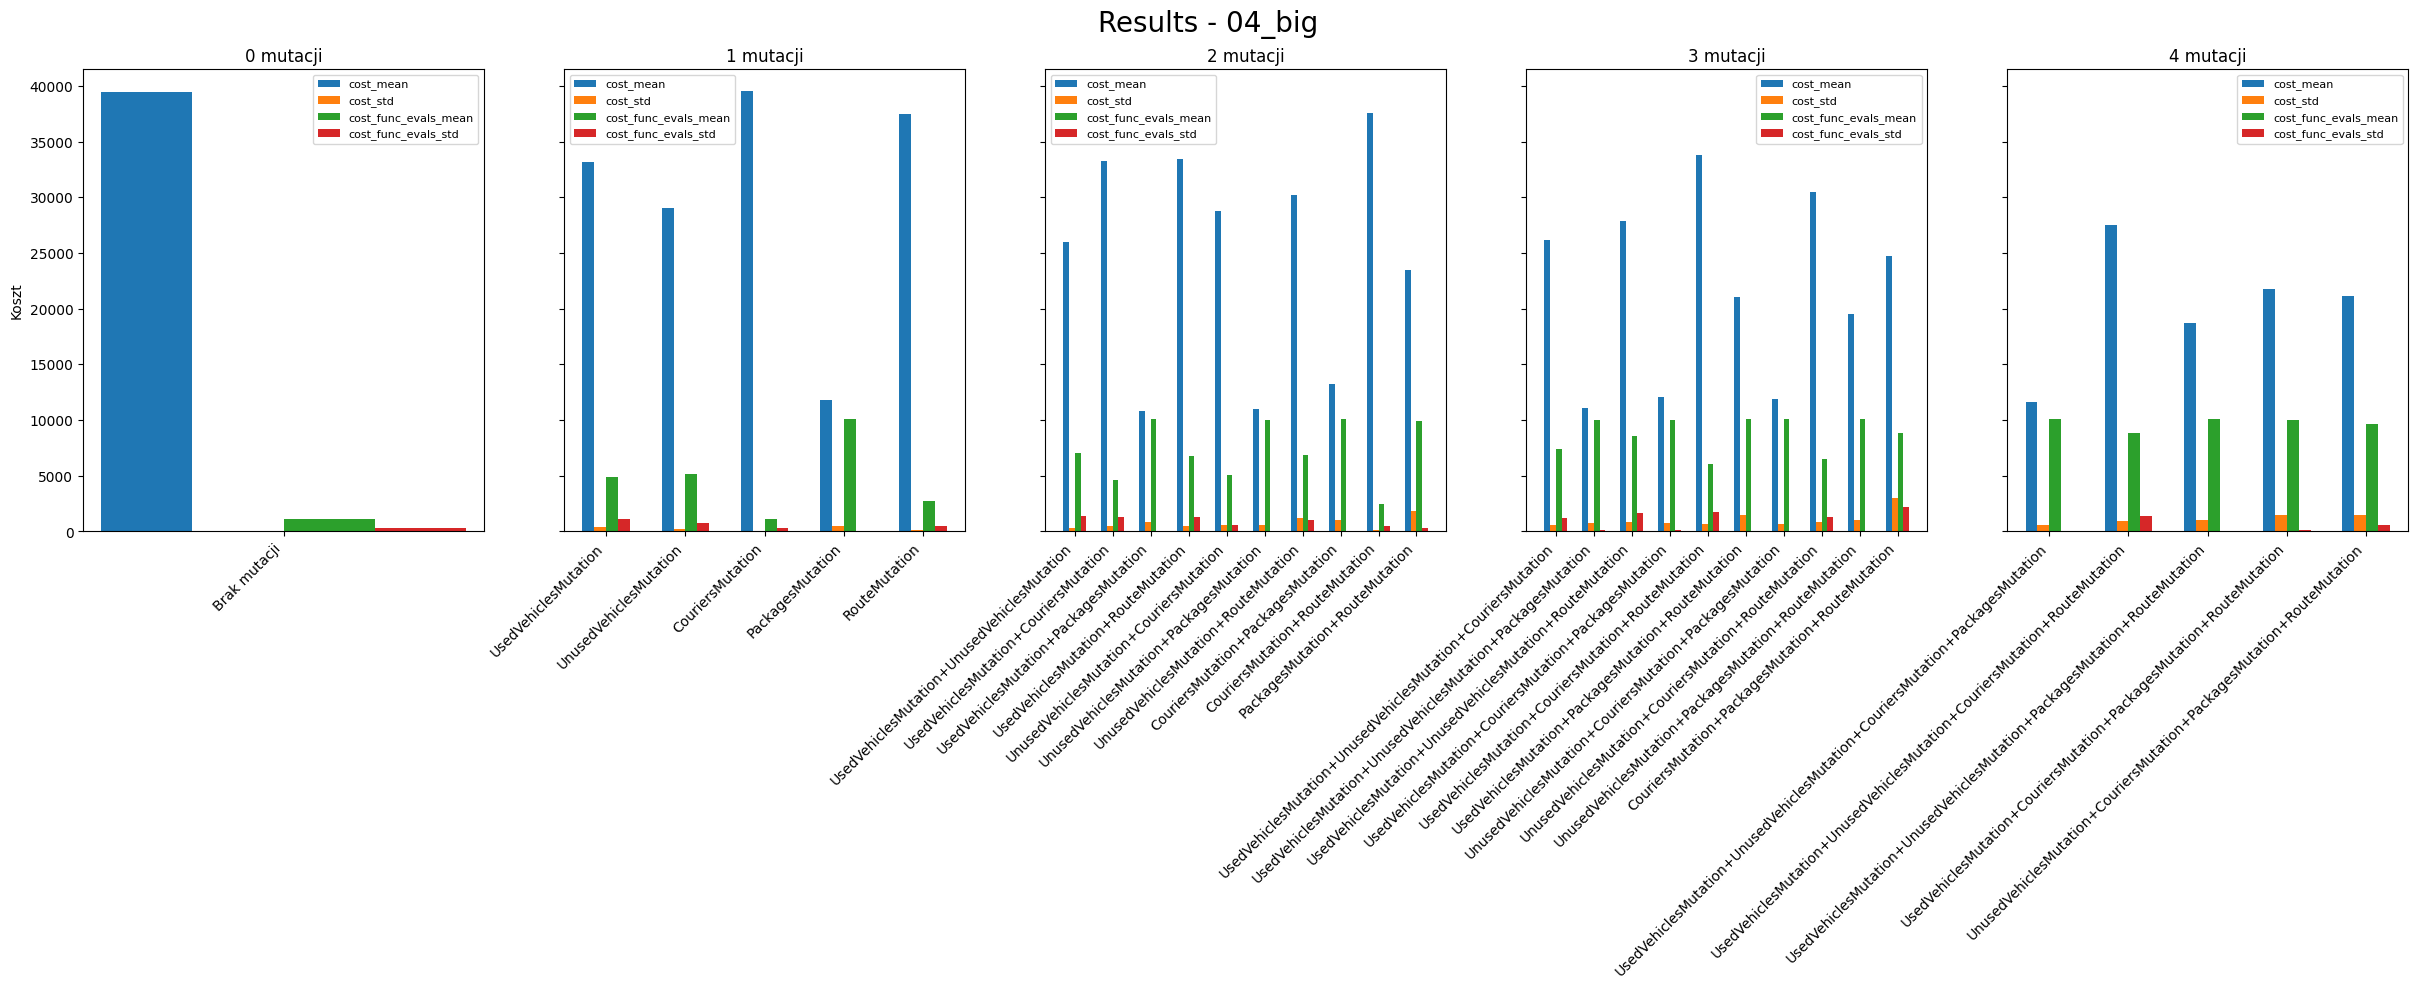

/tmp/ipykernel_37662/227439362.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0.03, 1, 0.90])


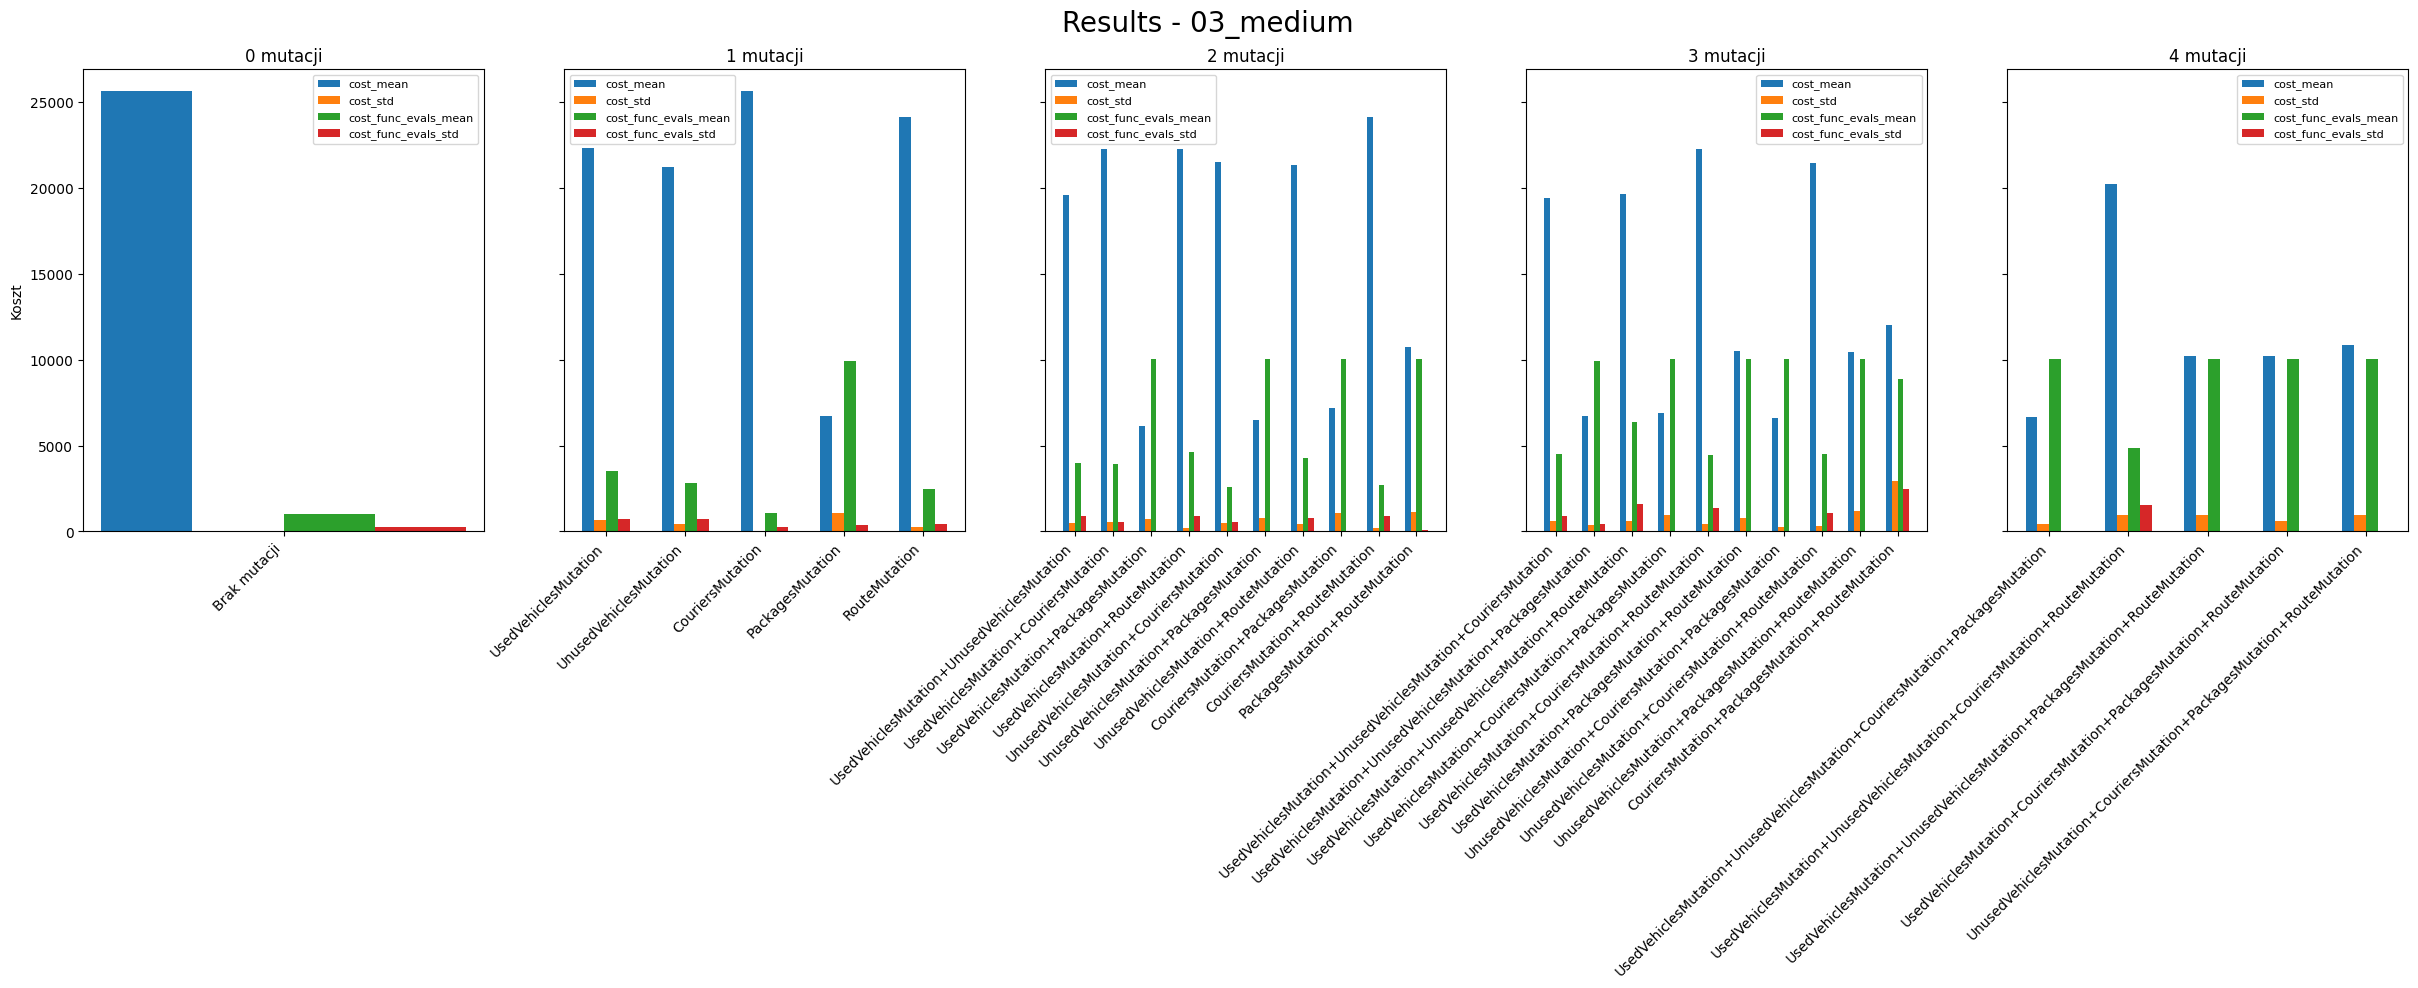

/tmp/ipykernel_37662/227439362.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0.03, 1, 0.90])


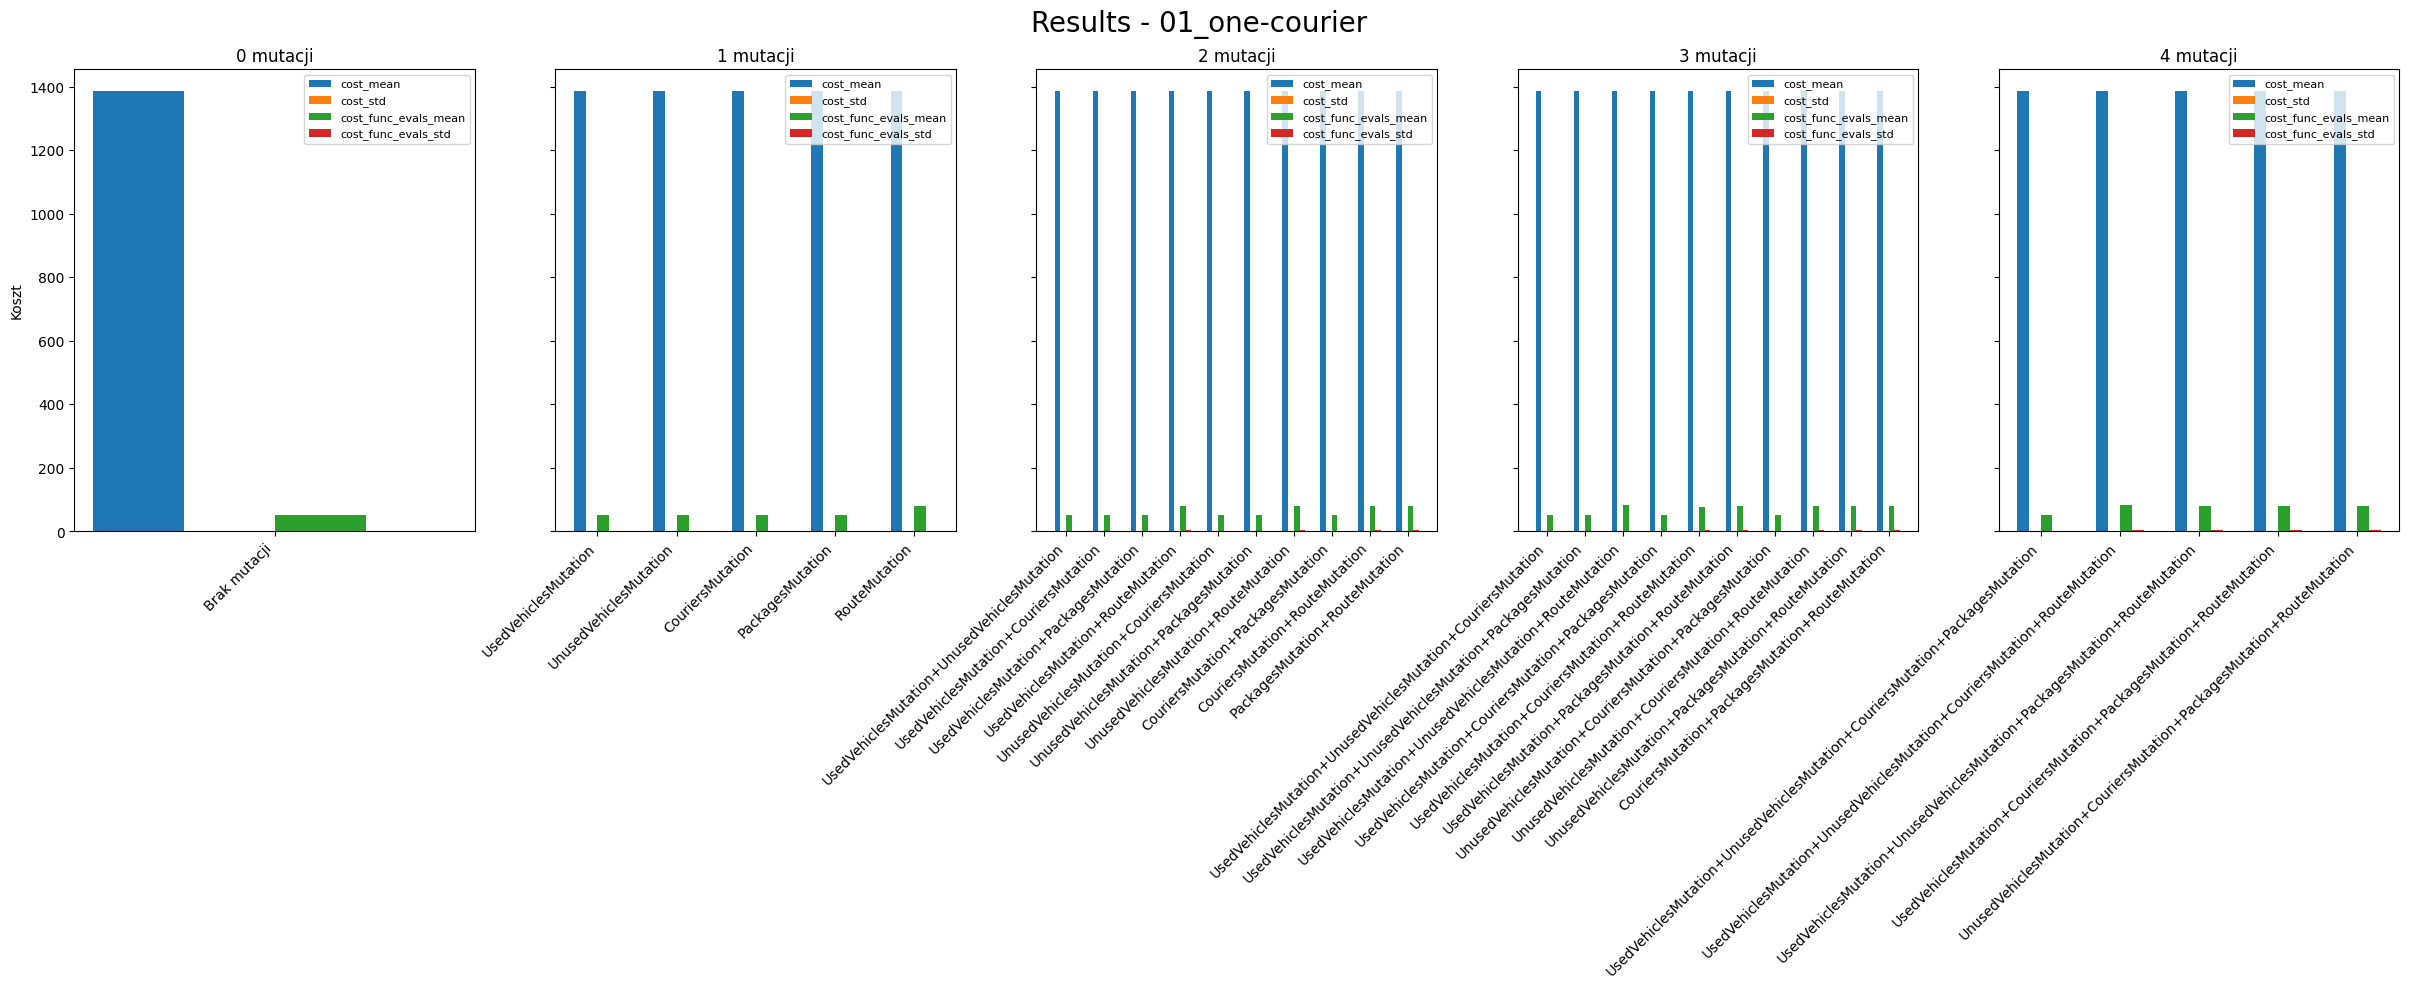

/tmp/ipykernel_37662/227439362.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0.03, 1, 0.90])


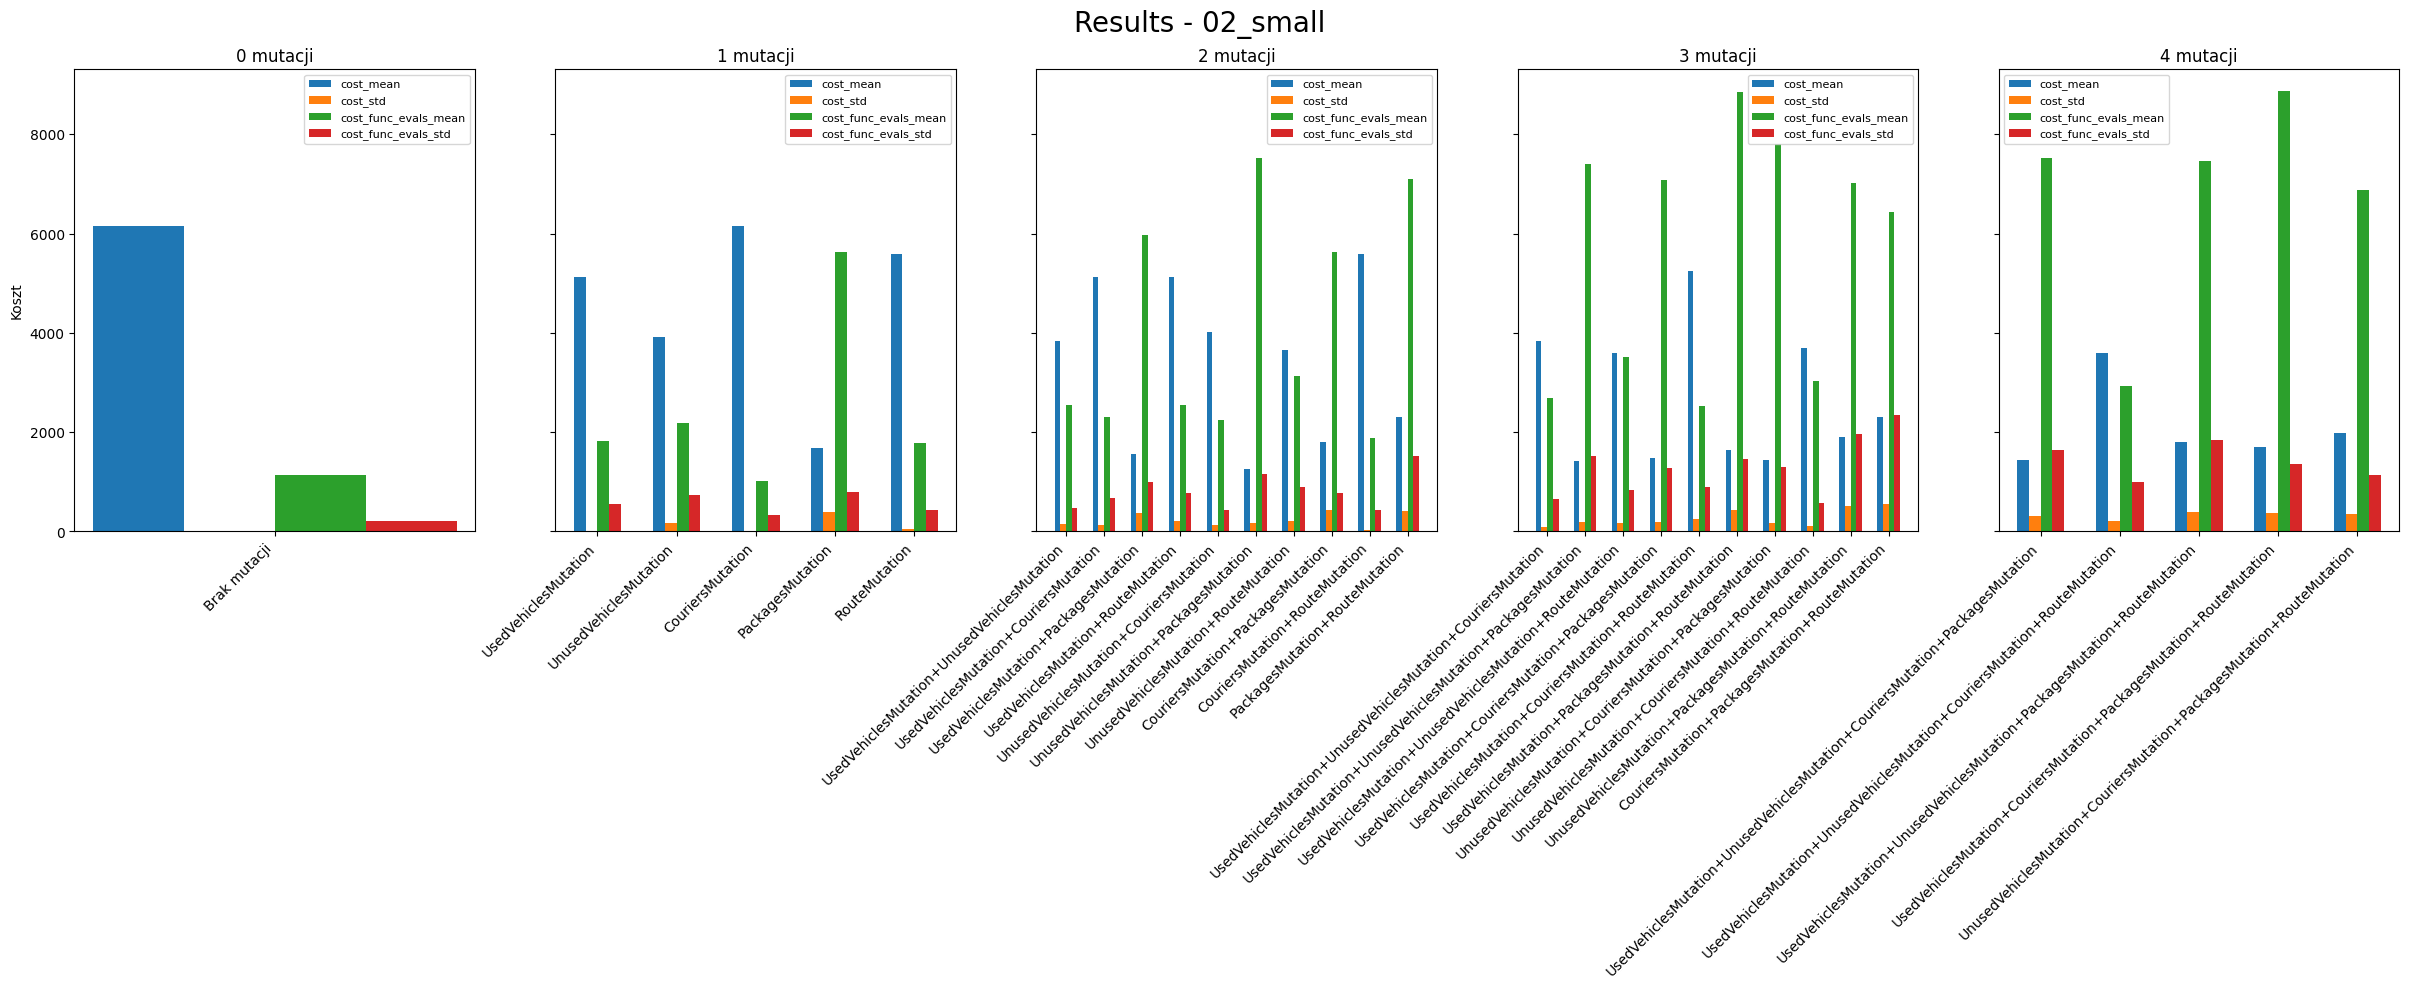

In [36]:
plot_statistics(
    results_df,
    stat_cols=["cost_mean", "cost_std", "cost_func_evals_mean", "cost_func_evals_std"],
)

/tmp/ipykernel_37662/227439362.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0.03, 1, 0.90])


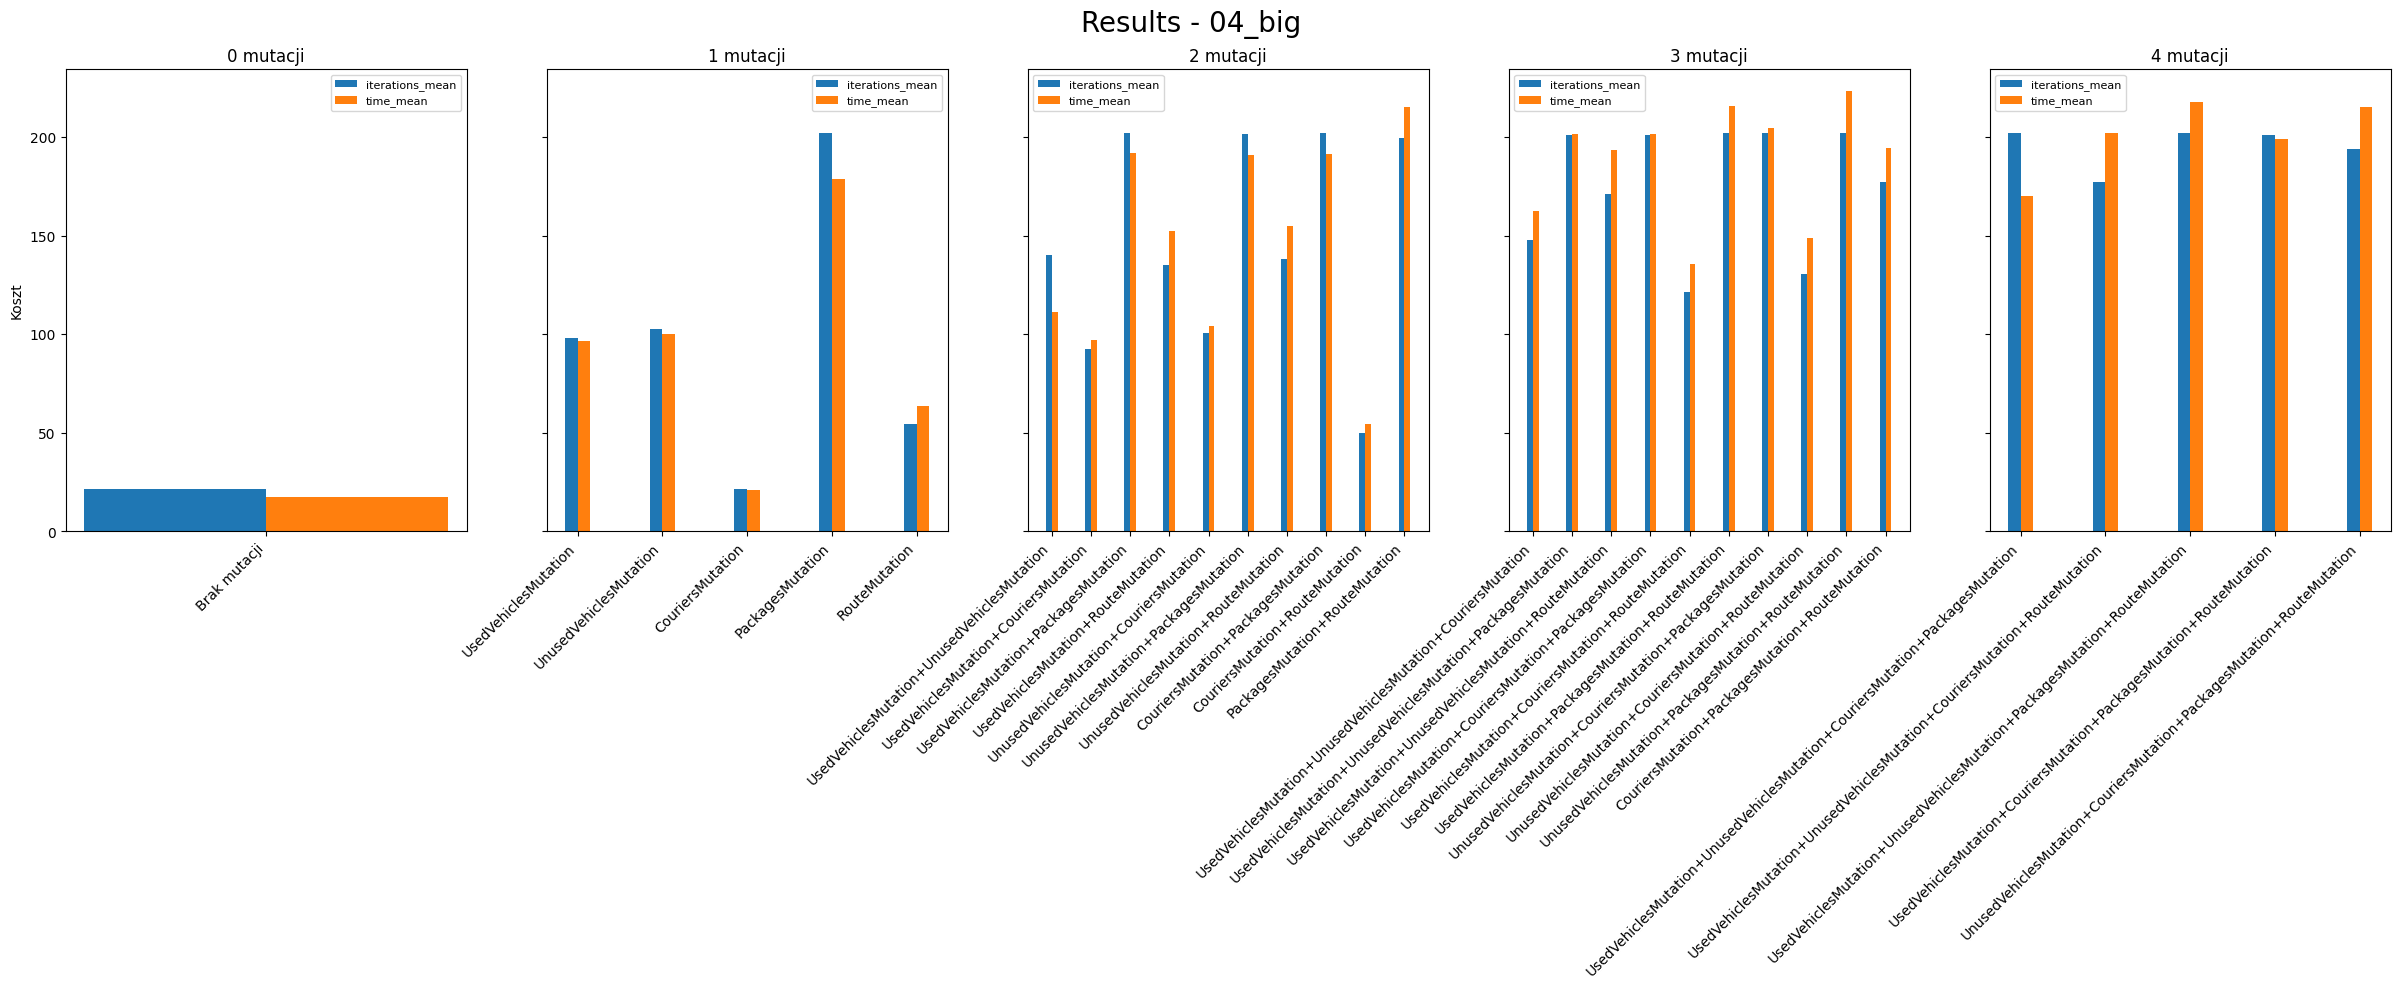

/tmp/ipykernel_37662/227439362.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0.03, 1, 0.90])


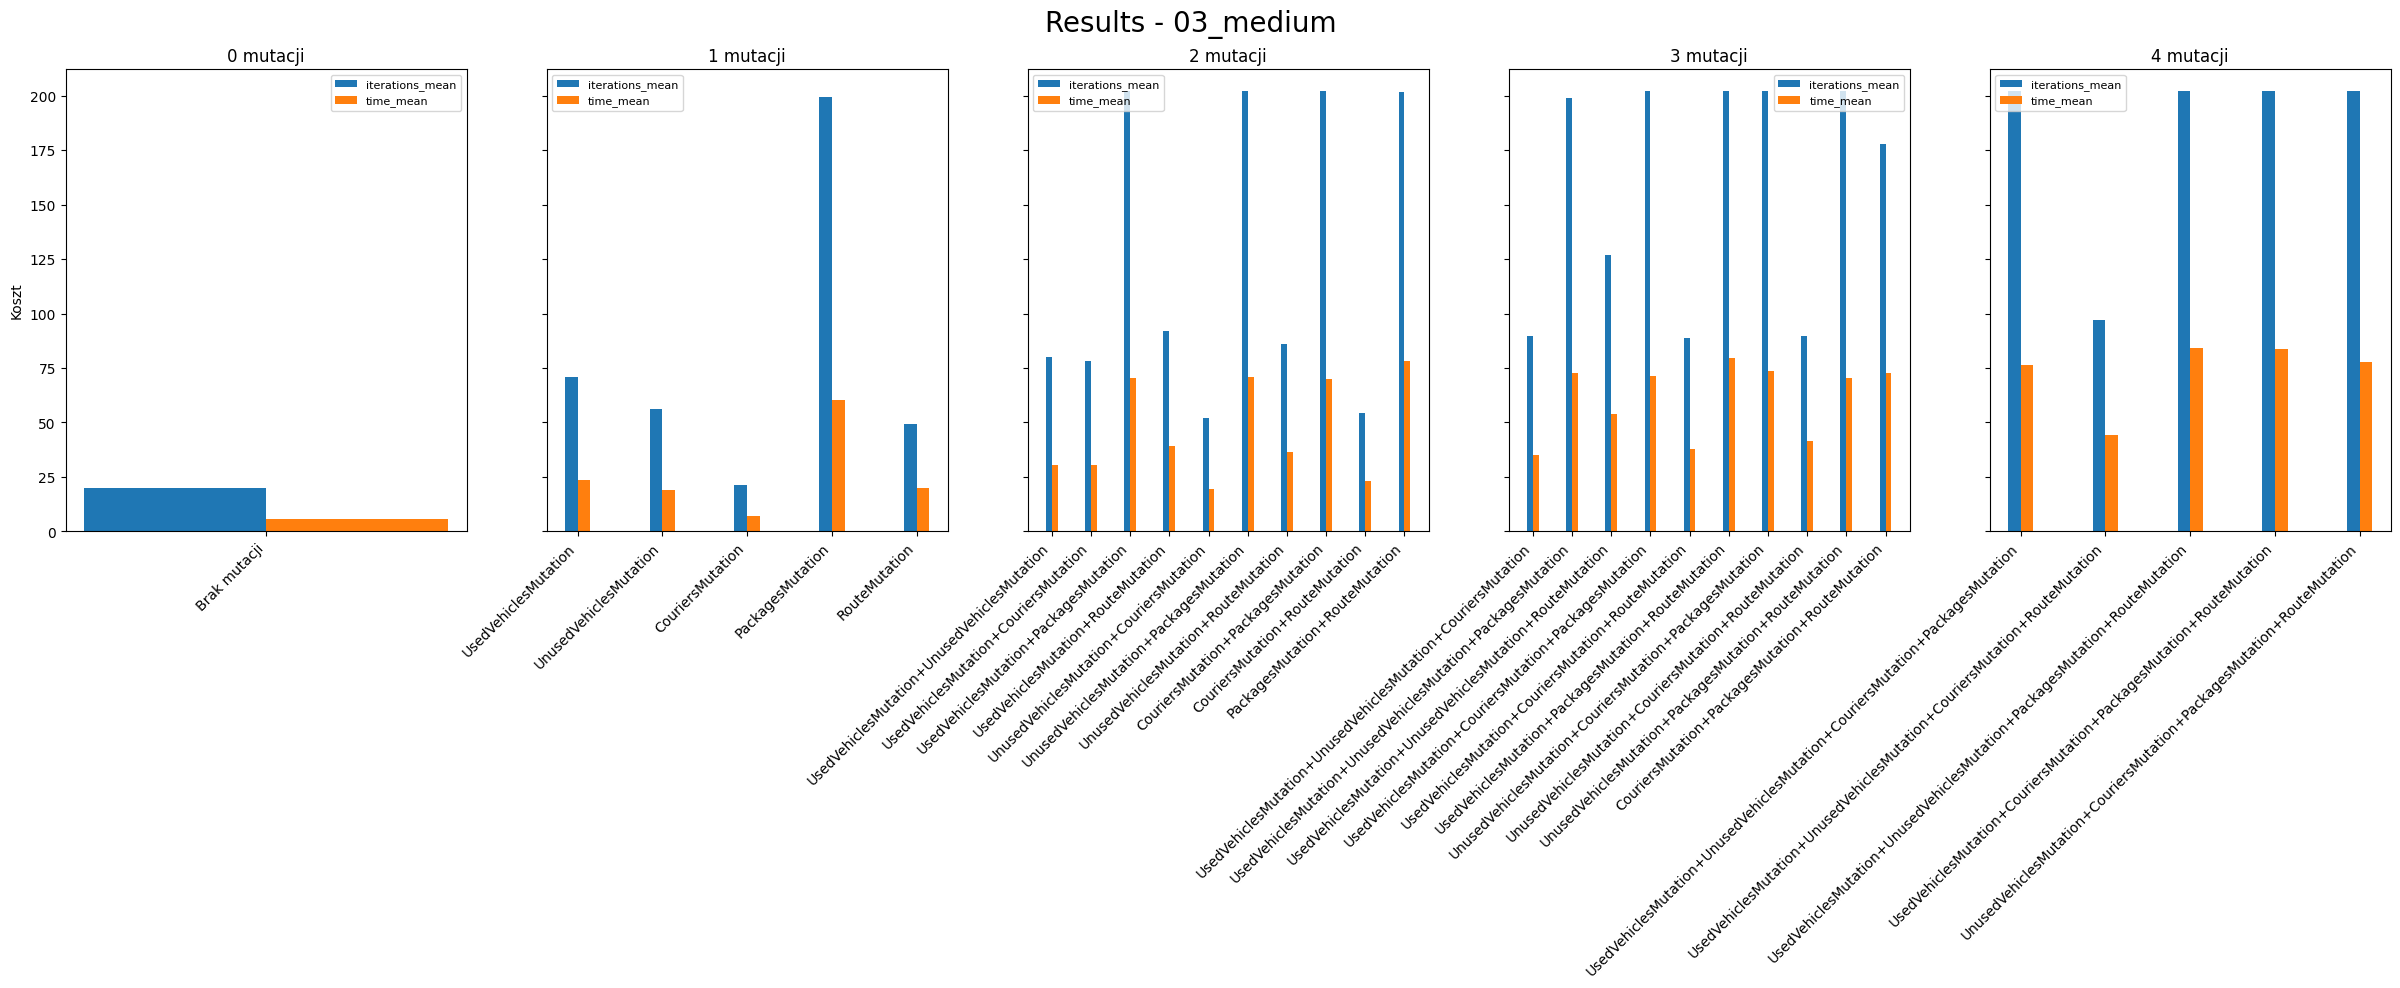

/tmp/ipykernel_37662/227439362.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0.03, 1, 0.90])


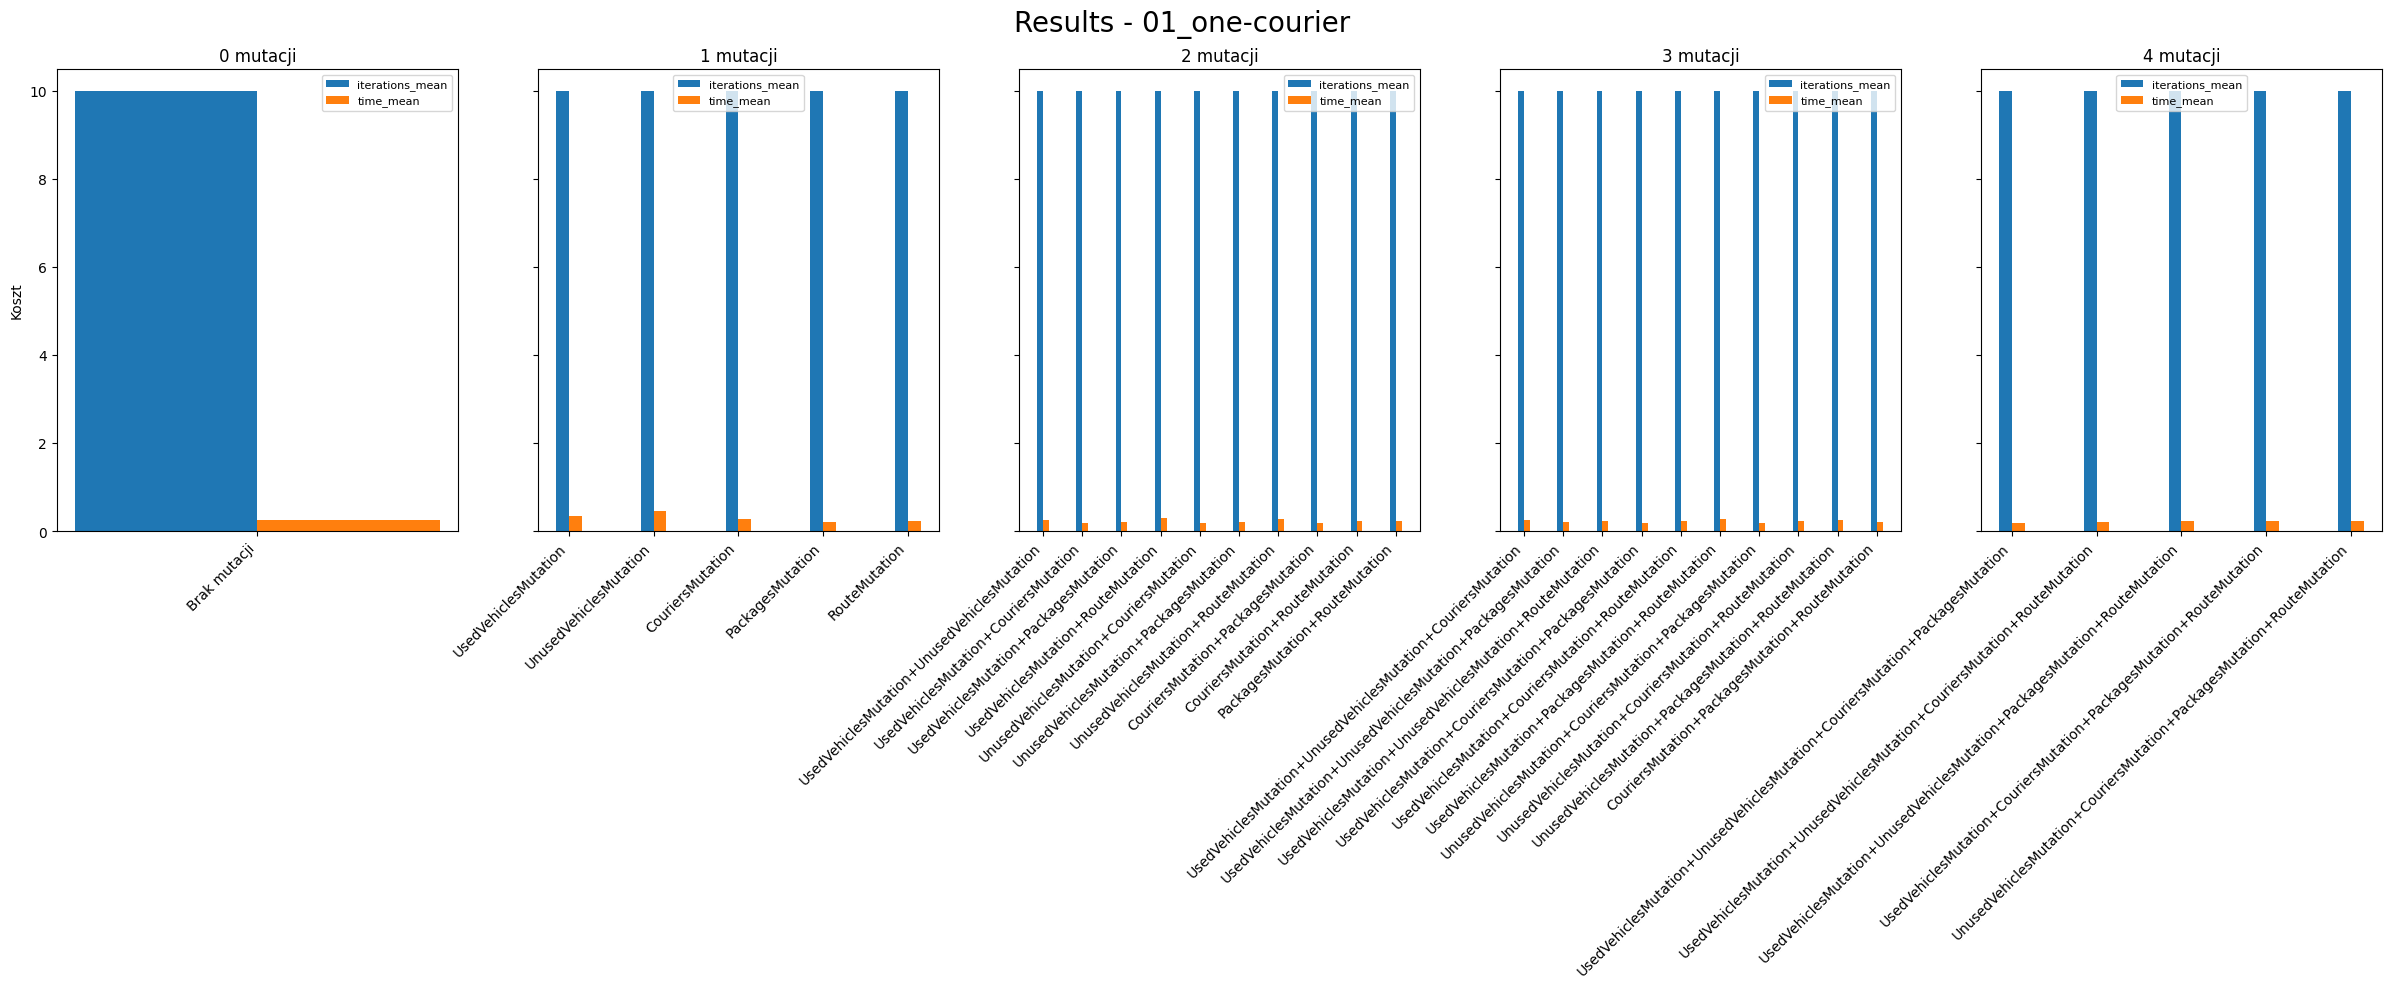

/tmp/ipykernel_37662/227439362.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0.03, 1, 0.90])


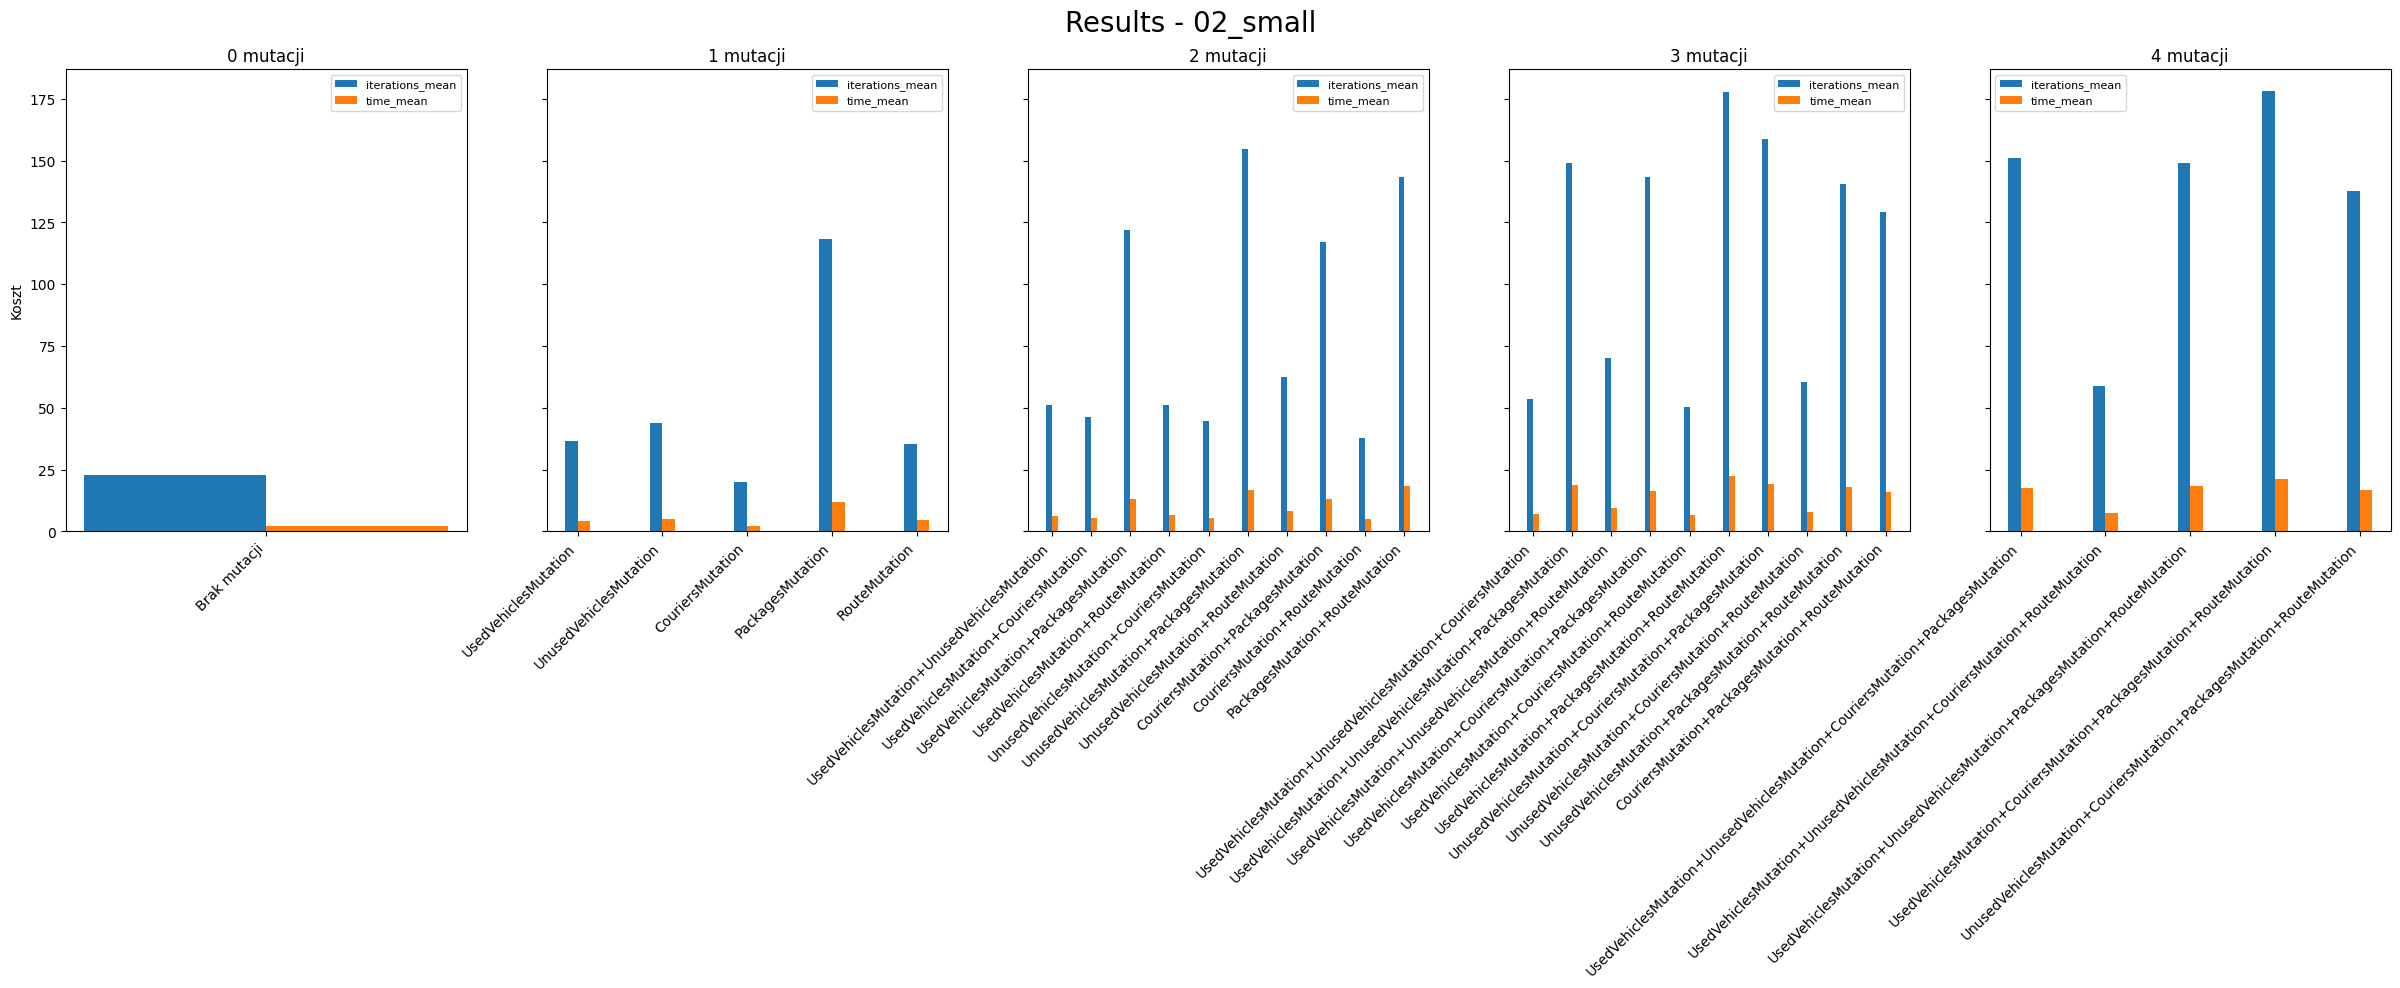

In [37]:
plot_statistics(
    results_df,
    stat_cols=["iterations_mean", "time_mean"],
)